In [1]:
cd ..

/home/jovyan/2018-W-450-4/02-learning-curves


In [2]:
run __init__.py

In [3]:
adult_feature_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                       'marital-status', 'occupation', 'relationship', 
                       'race', 'sex', 'capital-gain', 'capital-loss', 
                       'hours-per-week', 'native-country', 'target_class']

In [4]:
adult_df = pd.read_csv('data/adult.data.csv', header=None)
adult_df.columns = adult_feature_names
adult_data_df = adult_df.drop('target_class', axis=1)
adult_labels_srs = adult_df['target_class']
# series is columns in panda, a collection of series is dataframe

In [7]:
adult_labels_srs.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: target_class, dtype: object

In [55]:
adult_labels_srs.unique() 
# It's a binary classification

array([' <=50K', ' >50K'], dtype=object)

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_labels = (LabelEncoder()
                  .fit_transform(adult_labels_srs))

In [57]:
encoded_labels[20:25]

array([1, 0, 0, 0, 0])

In [59]:
adult_labels_srs = pd.Series(encoded_labels)
adult_labels_srs.unique()

array([0, 1])

1. Features should be dummy/one-hot encode
2. Target should be label/encode

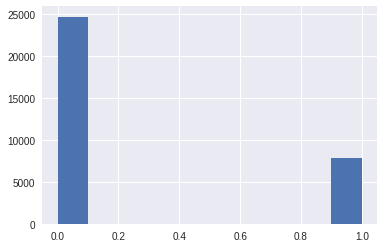

In [7]:
plt.hist(adult_labels_srs);
# It's a binary variable, there are way more 0 than 1.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
adult_train_data, \
    adult_test_data, \
    adult_train_labels, \
    adult_test_labels = train_test_split(adult_data_df, adult_labels_srs, test_size=0.23, 
                                         random_state=42, stratify=adult_labels_srs)
adult_train_data = adult_train_data.copy()
adult_test_data = adult_test_data.copy()
adult_train_labels = adult_train_labels.copy()
adult_test_labels = adult_test_labels.copy()
# "\" is to ignore the line break

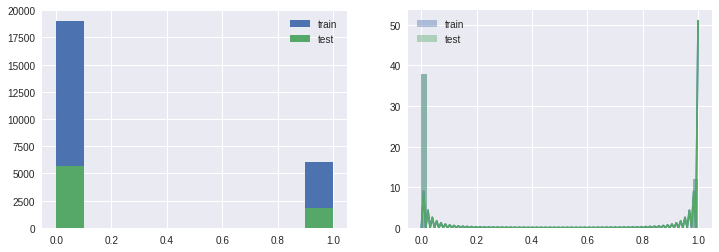

In [10]:
fig = plt.figure(figsize=(12,4))
fig.add_subplot(1,2,1)
plt.hist(adult_train_labels, label='train')
plt.hist(adult_test_labels, label='test')
plt.legend()
fig.add_subplot(1,2,2)
sns.distplot(adult_train_labels, label='train')
sns.distplot(adult_test_labels, label='test')
plt.legend()

In [11]:
(adult_train_data.shape,
 adult_test_data.shape,
 adult_train_labels.shape,
 adult_test_labels.shape)

((25071, 14), (7490, 14), (25071,), (7490,))

In [12]:
display(adult_train_data.sample(4))
display(adult_test_data.sample(4))

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
21703,34,Private,295855,11th,7,Divorced,Other-service,Not-in-family,White,Female,0,0,70,United-States
25429,50,Private,268553,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,7298,0,40,United-States
3820,24,Self-emp-not-inc,37440,Bachelors,13,Never-married,Farming-fishing,Unmarried,White,Male,0,0,50,United-States
16477,51,Private,162988,10th,6,Divorced,Other-service,Unmarried,White,Female,0,0,25,United-States


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
505,24,Private,388093,Bachelors,13,Never-married,Exec-managerial,Not-in-family,Black,Male,0,0,40,United-States
28501,52,Private,125932,7th-8th,4,Widowed,Other-service,Not-in-family,White,Female,0,0,40,United-States
22819,32,Local-gov,191731,Some-college,10,Never-married,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States
31955,46,Local-gov,267952,Assoc-voc,11,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,36,United-States


In [13]:
for col in adult_train_data.columns:
    if adult_train_data[col].dtype == object:
        print(col, adult_train_data[col].str.contains(' \?').sum())


workclass 1411
education 0
marital-status 0
occupation 1417
relationship 0
race 0
sex 0
native-country 443


In [14]:
for col in adult_test_data.columns:
    if adult_test_data[col].dtype == object:
        print(col, adult_test_data[col].str.contains(' \?').sum())


workclass 425
education 0
marital-status 0
occupation 426
relationship 0
race 0
sex 0
native-country 140


In [15]:
columns_with_na_vals = ['workclass', 'occupation', 'native-country']

In [16]:
for col in columns_with_na_vals:
    adult_train_data[col] = (adult_train_data[col]
                             .replace(to_replace=' ?', value=np.nan))
    adult_test_data[col] = (adult_test_data[col]
                            .replace(to_replace=' ?', value=np.nan))

In [17]:
for col in adult_train_data.columns:
    if adult_train_data[col].dtype == object:
        print(col, adult_train_data[col].str.contains(' \?').sum())


workclass 0
education 0
marital-status 0
occupation 0
relationship 0
race 0
sex 0
native-country 0


In [18]:
for col in adult_test_data.columns:
    if adult_test_data[col].dtype == object:
        print(col, adult_test_data[col].str.contains(' \?').sum())


workclass 0
education 0
marital-status 0
occupation 0
relationship 0
race 0
sex 0
native-country 0


In [19]:
for col in adult_train_data.columns:
    if adult_train_data[col].dtype == object:
        print(col, sum(adult_train_data[col].isnull()))


workclass 1411
education 0
marital-status 0
occupation 1417
relationship 0
race 0
sex 0
native-country 443


In [20]:
for col in adult_test_data.columns:
    if adult_test_data[col].dtype == object:
        print(col, sum(adult_test_data[col].isnull()))


workclass 425
education 0
marital-status 0
occupation 426
relationship 0
race 0
sex 0
native-country 140


In [21]:
workclass_null_indices = set(adult_train_data[adult_train_data['workclass'].isnull()].index)
occupation_null_indices = set(adult_train_data[adult_train_data['occupation'].isnull()].index)
native_country_null_indices = set(adult_train_data[adult_train_data['native-country'].isnull()].index)

In [22]:
len(workclass_null_indices | occupation_null_indices | native_country_null_indices)/len(adult_train_data)

0.07339156794703043

In [23]:
actual_types = ['continuous','categorical','continuous','categorical','continuous','categorical','categorical','categorical','categorical','categorical','continuous','continuous','continuous','categorical']

In [24]:
actual_types = pd.Series(actual_types, index=adult_train_data.dtypes.index)


In [25]:
pd.DataFrame([adult_train_data.dtypes, adult_test_data.dtypes, actual_types], 
             index=['train_set','test_set', 'actual_types']).T


,train_set,test_set,actual_types
age,int64,int64,continuous
workclass,object,object,categorical
fnlwgt,int64,int64,continuous
education,object,object,categorical
education-num,int64,int64,continuous
marital-status,object,object,categorical
occupation,object,object,categorical
relationship,object,object,categorical
race,object,object,categorical
sex,object,object,categorical


In [26]:
adult_dtypes = adult_train_data.dtypes
adult_numeric_features = list(adult_dtypes[adult_dtypes==int].index)
adult_categorical_features = list(adult_dtypes[adult_dtypes == 'object'].index)
adult_numeric_features, adult_categorical_features

(['age',
  'fnlwgt',
  'education-num',
  'capital-gain',
  'capital-loss',
  'hours-per-week'],
 ['workclass',
  'education',
  'marital-status',
  'occupation',
  'relationship',
  'race',
  'sex',
  'native-country'])

In [60]:
skew_values = list()
adult_train_stats = adult_train_data.describe().T
for num_col in adult_train_stats.index:
    num_col_skew = stats.skew(adult_train_data[num_col])
    skew_values.append(num_col_skew)
adult_train_stats['skew'] = skew_values
adult_train_stats.drop(['count','25%','50%','75%'],axis=1)

,mean,std,min,max,skew
age,38.569702,13.617063,17.0,90.0,0.560017
fnlwgt,190222.131507,105715.813304,13769.0,1484705.0,1.471826
education-num,10.078138,2.586963,1.0,16.0,-0.328824
capital-gain,1038.676878,7131.690393,0.0,99999.0,12.288018
capital-loss,87.143672,403.316592,0.0,4356.0,4.628847
hours-per-week,40.468629,12.397220,1.0,99.0,0.253956


In [63]:
some_series = pd.Series ((1,2,3,4,5))

In [64]:
mask = [True, False, False, True, True]

In [65]:
some_series[some_series >2]

2    3
3    4
4    5
dtype: int64

In [28]:
def distplot_by_label(feature, target):
    labels = target.unique()
    for label in labels:
        sns.distplot(feature[target==label])
        
        
def ANOVA_by_feature(feature, target):  
    labels = target.unique()
    feature_by_label = [
        feature[target==label] for label in labels
    ]
    return stats.f_oneway(*feature_by_label)

age                  ANOVA p-value: 1.012701675536142e-306
fnlwgt               ANOVA p-value: 0.03714412547728627
education-num        ANOVA p-value: 0.0
capital-gain         ANOVA p-value: 1.3818869255784053e-276
capital-loss         ANOVA p-value: 4.6265874906929785e-121
hours-per-week       ANOVA p-value: 2.452757077476283e-292


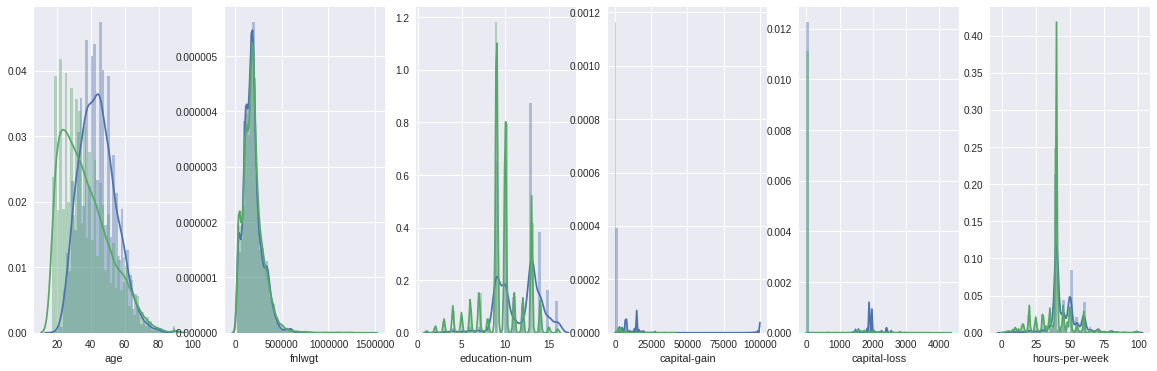

In [66]:
fig = plt.figure(figsize=(20,6))
n = len(adult_numeric_features)
for i, feature in enumerate(adult_numeric_features):
    fig.add_subplot(1, n, i+1)
    distplot_by_label(adult_train_data[feature], adult_train_labels)
    print("{:20} ANOVA p-value: {}".format(feature, ANOVA_by_feature(adult_train_data[feature], adult_train_labels).pvalue))
    
    # From the p-value, we can tell the "age" is extremely important for the prediction. 
    # Capital gain, capital loss, hours-per-week are also important.

In [30]:
adult_train_with_label = adult_train_data.copy()
adult_train_with_label['label'] = adult_train_labels
ct = pd.crosstab(index = adult_train_with_label['workclass'], columns=adult_train_with_label['label'])
ct.columns = ['<=$50k','>$50K']
ct

,<=$50k,>$50K
workclass,,
Federal-gov,459,286
Local-gov,1158,475
Never-worked,6,0
Private,13620,3800
Self-emp-inc,381,488
Self-emp-not-inc,1392,561
State-gov,741,280
Without-pay,13,0


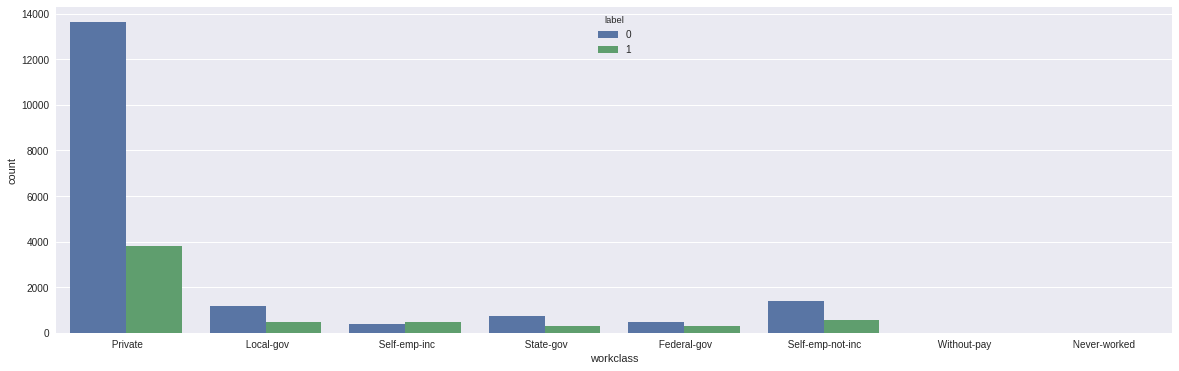

In [31]:
fig = plt.figure(figsize=(20,6))
sns.countplot('workclass', hue='label', data=adult_train_with_label)
# distribution of target data, label 0 = less than 50k, lable 1 = more than 50k

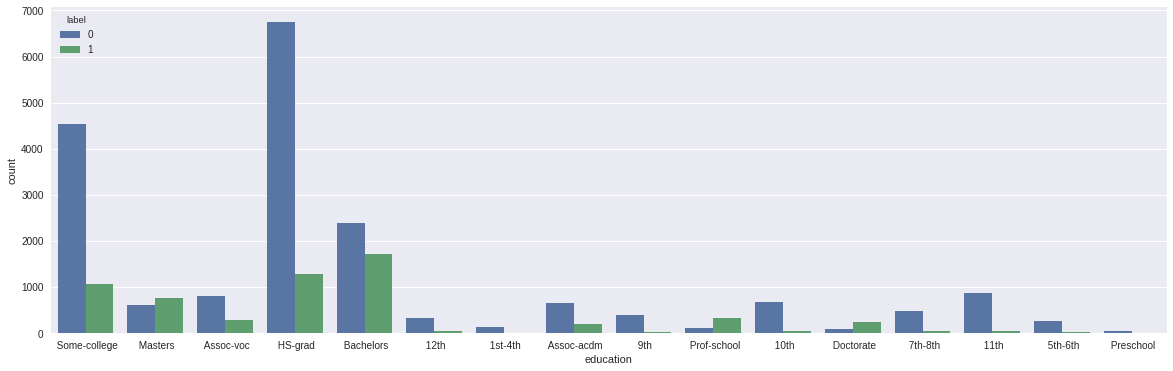

In [32]:
fig = plt.figure(figsize=(20,6))
sns.countplot('education', hue='label', data=adult_train_with_label)

In [33]:
adult_train_data.to_pickle('data/adult_train_data.p')
adult_test_data.to_pickle('data/adult_test_data.p')
adult_train_labels.to_pickle('data/adult_train_labels.p')
adult_test_labels.to_pickle('data/adult_test_labels.p')